## Basé sur la mémoire à long terme et à court terme (LSTM) - Prédiction des stocks - # basé sur le processeur 

Objectif : prédire le cours d’ouverture de l’action en utilisant le cours de l’action des 60 derniers jours. 

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


## Préparation des données 

Fonctionne sur les données basées sur Yahoo. (Ne contient pas les valeurs des actions indiennes) 

In [2]:
df = pd.read_csv('datasets/GOOGL.csv')
print("DataFrame Shape: {} rows, {} columns".format(*df.shape))
display(df.head())

DataFrame Shape: 2335 rows, 7 columns


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [3]:


df.shape



(2335, 7)

In [4]:
# choix du pype d affichage

#plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')


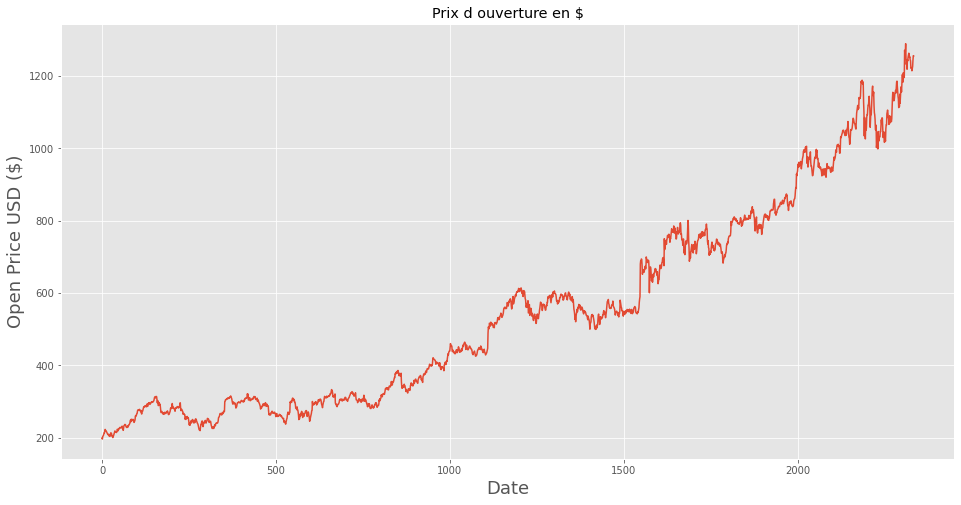

In [5]:
# affichage

plt.figure(figsize=(16,8))
plt.title('Prix d ouverture en $')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()


In [6]:
data=df.filter(['Open'])

# Convertir en tableau np
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


# print(dataset)
training_data_len

1868

In [7]:
# normalisation

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [8]:
# Créer un ensemble de données d'entraînement
# Créer un ensemble de données d'entraînement à l'échelle

train_data = scaled_data[0:training_data_len,:]

# Divisez les données en ensembles de données x_train et y_train

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00215688, 0.        , 0.00626914, 0.00766126, 0.00923199,
       0.01226352, 0.01570719, 0.01559271, 0.01985153, 0.02432555,
       0.02177485, 0.02135355, 0.0202774 , 0.01823501, 0.01598654,
       0.01353201, 0.01252913, 0.01110036, 0.01086682, 0.0120254 ,
       0.0114484 , 0.00673166, 0.00768874, 0.00689193, 0.00995094,
       0.01559271, 0.01467685, 0.01476844, 0.01074318, 0.00666297,
       0.00745978, 0.00368638, 0.00648895, 0.00807341, 0.0110912 ,
       0.01454404, 0.01726876, 0.02048348, 0.01879827, 0.0173695 ,
       0.01785492, 0.01650859, 0.01681998, 0.02008507, 0.02476975,
       0.02246175, 0.02073533, 0.02319902, 0.02657401, 0.02600617,
       0.02629468, 0.02933079, 0.0285523 , 0.02917968, 0.02893696,
       0.0282638 , 0.02906062, 0.0321471 , 0.0324356 , 0.02727009])]
[0.024339285119793108]



In [9]:
# convertissez les x_train et y_train en tableaux numpy 
x_train, y_train = np.array(x_train), np.array(y_train)


In [10]:
# Remodelez les données en 3 dimensions

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1808, 60, 1)

## Formation sur modèle 

In [11]:
# Build LSTM model
model=Sequential()

# Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))

# Add second layer to model
model.add(LSTM(50, return_sequences=False))

# Add Dense Layer to model with 25 neurons
model.add(Dense(25))

# Add Dense Layer to model with 1 neuron
model.add(Dense(1))


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

2023-10-14 21:06:47.236144: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
1808/1808 [==============================] - 67s 35ms/step - loss: 7.9913e-04
Epoch 2/3
1808/1808 [==============================] - 63s 35ms/step - loss: 2.7456e-04
Epoch 3/3
1808/1808 [==============================] - 63s 35ms/step - loss: 2.3621e-04


## Modèle de test et de validation 

In [14]:
# Créer l'ensemble de données de test 
# Créer un nouveau tableau contenant des valeurs mises à l'échelle 
    
test_data=scaled_data[training_data_len-60: , : ]

# Créer les ensembles de données x_test et y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [15]:
# Convertissez les données en un tableau numpy 

x_test=np.array(x_test)


In [16]:
# Remodeler les données en 3D 

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Obtenez les modèles de valeurs de prix prédites 

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [18]:
# Obtenir l'erreur quadratique moyenne (RMSE) 

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

7.66513983469118

In [19]:
#choisissez le style de traçage 

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')


/var/folders/f2/nwh0qtfn1dx9nd5d1sl92d940000gn/T/ipykernel_971/2563169301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


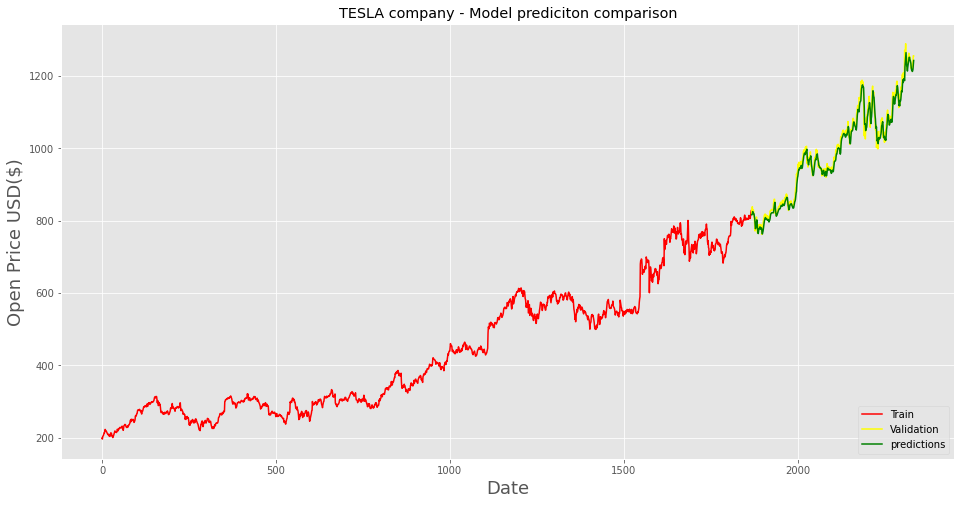

In [20]:
#tracer le 

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('TESLA company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('prediction.png')
plt.show()


In [27]:
df[2320:2321]

,Date,Open,High,Low,Close,Adj Close,Volume
2320,2018-08-09,1262.72998,1271.959961,1260.099976,1264.459961,1264.459961,1365700


In [36]:
# Afficher les prix valides et prévus 

valid.tail(15)

,Open,predictions
2320,1262.729980,1246.024780
2321,1259.180054,1251.488647
2322,1251.199951,1251.372559
2323,1252.500000,1245.817505
2324,1244.280029,1242.956909
2325,1241.989990,1237.825317
2326,1222.040039,1234.310303
2327,1220.660034,1222.885864
2328,1223.020020,1216.266602
2329,1214.219971,1215.711914


## Obtenir des prédictions - pour demain 

In [28]:


# Get the quote
# stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df = df.filter(['Open'])
 #new_df = stock_quote.filter(['Open'])
    
# Obtenez les valeurs des 60 derniers jours et convertissez-les en tableau
last_60_days=new_df[-60:].values

# Mettez à l'échelle les données pour qu'elles soient des valeurs comprises entre 0 et 1
last_60_days_scaled=scaler.transform(last_60_days)

# Créer une liste vide
X_test=[]

# Ajouter les 60 derniers jours
X_test.append(last_60_days_scaled)

# Convertir les données X_test en tableau numpy
X_test = np.array(X_test)

# Remodeler les données
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

# Obtenez un prix échelonné prévu
pred_price = model.predict(X_test)

# annuler la mise à l'échelle
pred_price=scaler.inverse_transform(pred_price)
print(f' tomorrow:{pred_price}')


 tomorrow:[[1247.1915]]


## Obtenir des pronostics pour 2 mois à partir de maintenant ? 

In [29]:
#Get the quote
# stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df = df.filter(['Open'])
#new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f' tomorrow:{pred_price}')


 tomorrow:[[1247.1915]]
